In [2]:
import subprocess
import re
import csv
import os

def run_experiment(n_value, batch_size):
    # Build the command line as a list of arguments.
    # Adjust the file path if needed (here we assume the file is in acrobot/ folder).
    command = [
        "mjwarp-testspeed",
        "--function=step",
        f"--mjcf=acrobot/{n_value}_acrobots.xml",
        f"--batch_size={batch_size}",
        "--event_trace=True",
        "--is_sparse"
    ]
    
    print("Running command:", " ".join(command))
    
    # Run the command and capture the output.
    result = subprocess.run(command, capture_output=True, text=True)
    
    # For debugging purposes, you might want to print the complete output:
    # print(result.stdout)
    
    # Use regex to extract the factor_m value from the output.
    match = re.search(r'factor_m:\s*([\d\.]+)', result.stdout)
    if match:
        factor_m = float(match.group(1))
        print(f"Found factor_m: {factor_m}")
    else:
        print("Warning: factor_m not found in output.")
        factor_m = None
    return factor_m

def append_to_csv(csv_file, row, header):
    # Check if the CSV file exists already.
    file_exists = os.path.isfile(csv_file)
    
    with open(csv_file, mode='a', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=header)
        if not file_exists:
            writer.writeheader()  # Write header only if file didn't exist.
        writer.writerow(row)

def main():
    # Define the independent variable values.
    n_values = [1, 25, 50]
    batch_sizes = [128, 512, 1024]
    
    # CSV file to store the results.
    csv_file = "results.csv"
    header = ['n_acrobots', 'batch_size', 'factor_m']
    
    # Loop over each combination.
    for n in n_values:
        for batch_size in batch_sizes:
            factor_m = run_experiment(n, batch_size)
            # Append the results row to the CSV.
            row = {'n_acrobots': n, 'batch_size': batch_size, 'factor_m': factor_m}
            append_to_csv(csv_file, row, header)

if __name__ == "__main__":
    main()


Running command: mjwarp-testspeed --function=step --mjcf=acrobot/1_acrobots.xml --batch_size=128 --event_trace=True --is_sparse
Found factor_m: 42.25
Running command: mjwarp-testspeed --function=step --mjcf=acrobot/1_acrobots.xml --batch_size=512 --event_trace=True --is_sparse
Found factor_m: 10.19
Running command: mjwarp-testspeed --function=step --mjcf=acrobot/1_acrobots.xml --batch_size=1024 --event_trace=True --is_sparse
Found factor_m: 5.12
Running command: mjwarp-testspeed --function=step --mjcf=acrobot/25_acrobots.xml --batch_size=128 --event_trace=True --is_sparse
Found factor_m: 41.31
Running command: mjwarp-testspeed --function=step --mjcf=acrobot/25_acrobots.xml --batch_size=512 --event_trace=True --is_sparse
Found factor_m: 11.85
Running command: mjwarp-testspeed --function=step --mjcf=acrobot/25_acrobots.xml --batch_size=1024 --event_trace=True --is_sparse
Found factor_m: 7.01
Running command: mjwarp-testspeed --function=step --mjcf=acrobot/50_acrobots.xml --batch_size=128

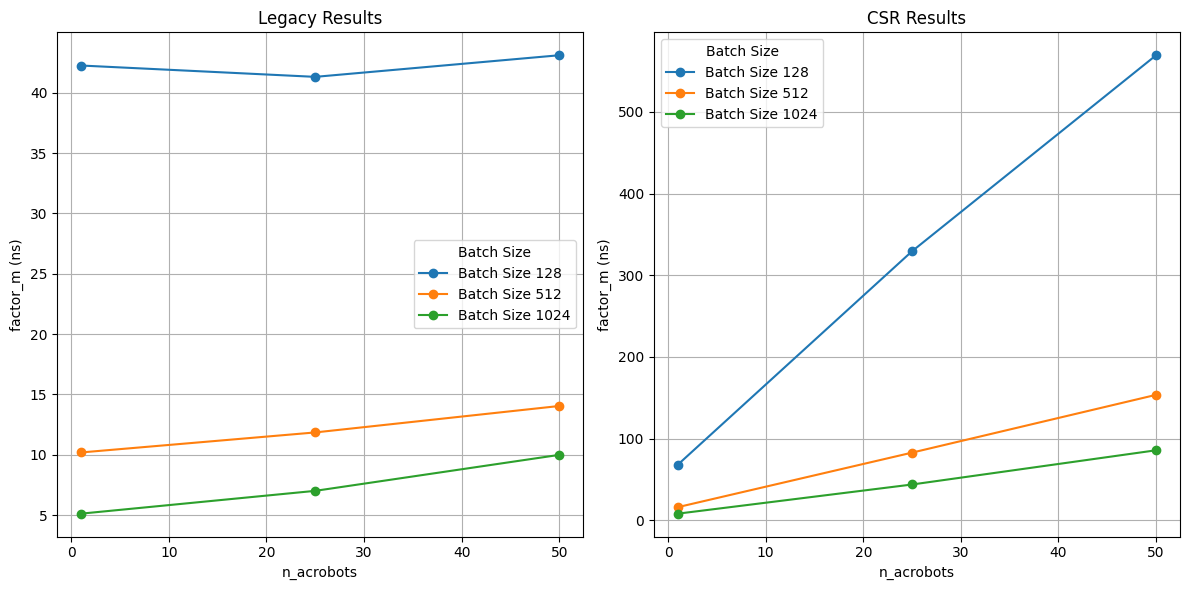

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # adjust size as needed
files = ["results.csv", "csr_results.csv"]
titles = ["Legacy Results", "CSR Results"]

for ax, file, title in zip(axes, files, titles):
    df = pd.read_csv(file)
    for bs in sorted(df['batch_size'].unique()):
        subset = df[df['batch_size'] == bs]
        ax.plot(subset['n_acrobots'], subset['factor_m'], marker='o', linestyle='-', label=f'Batch Size {bs}')
    ax.set_title(title)
    ax.set_xlabel('n_acrobots')
    ax.set_ylabel('factor_m (ns)')
    ax.grid(True)
    ax.legend(title='Batch Size')

plt.tight_layout()
plt.show()
